In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from attention_seq2seq import AttentionSeq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq
import datetime

## 觀察資料

In [2]:
!head -15 dataset/date.txt

september 27, 1994           _1994-09-27
August 19, 2003              _2003-08-19
2/10/93                      _1993-02-10
10/31/90                     _1990-10-31
TUESDAY, SEPTEMBER 25, 1984  _1984-09-25
JUN 17, 2013                 _2013-06-17
april 3, 1996                _1996-04-03
October 24, 1974             _1974-10-24
AUGUST 11, 1986              _1986-08-11
February 16, 2015            _2015-02-16
October 12, 1988             _1988-10-12
6/3/73                       _1973-06-03
Sep 30, 1981                 _1981-09-30
June 19, 1977                _1977-06-19
OCTOBER 22, 2005             _2005-10-22


## 建立 Attention model

In [3]:
# 載入資料
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 反轉輸入內容
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# 設定超參數
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    print(datetime.datetime.now())
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))


model.save_params()


2019-12-05 08:33:51.490044
| epoch 1 |  iter 1 / 351 | time 0[s] | loss 4.08
| epoch 1 |  iter 21 / 351 | time 9[s] | loss 3.09
| epoch 1 |  iter 41 / 351 | time 18[s] | loss 1.90
| epoch 1 |  iter 61 / 351 | time 28[s] | loss 1.72
| epoch 1 |  iter 81 / 351 | time 37[s] | loss 1.46
| epoch 1 |  iter 101 / 351 | time 46[s] | loss 1.19
| epoch 1 |  iter 121 / 351 | time 55[s] | loss 1.14
| epoch 1 |  iter 141 / 351 | time 64[s] | loss 1.09
| epoch 1 |  iter 161 / 351 | time 74[s] | loss 1.06
| epoch 1 |  iter 181 / 351 | time 83[s] | loss 1.04
| epoch 1 |  iter 201 / 351 | time 92[s] | loss 1.03
| epoch 1 |  iter 221 / 351 | time 101[s] | loss 1.02
| epoch 1 |  iter 241 / 351 | time 110[s] | loss 1.02
| epoch 1 |  iter 261 / 351 | time 120[s] | loss 1.01
| epoch 1 |  iter 281 / 351 | time 129[s] | loss 1.00
| epoch 1 |  iter 301 / 351 | time 138[s] | loss 1.00
| epoch 1 |  iter 321 / 351 | time 147[s] | loss 1.00
| epoch 1 |  iter 341 / 351 | time 157[s] | loss 1.00
Q 10/15/94          

val acc 99.920%
2019-12-05 08:52:52.739164
| epoch 6 |  iter 1 / 351 | time 0[s] | loss 0.00
| epoch 6 |  iter 21 / 351 | time 13[s] | loss 0.00
| epoch 6 |  iter 41 / 351 | time 28[s] | loss 0.00
| epoch 6 |  iter 61 / 351 | time 40[s] | loss 0.00
| epoch 6 |  iter 81 / 351 | time 52[s] | loss 0.00
| epoch 6 |  iter 101 / 351 | time 65[s] | loss 0.00
| epoch 6 |  iter 121 / 351 | time 75[s] | loss 0.00
| epoch 6 |  iter 141 / 351 | time 86[s] | loss 0.00
| epoch 6 |  iter 161 / 351 | time 99[s] | loss 0.00
| epoch 6 |  iter 181 / 351 | time 111[s] | loss 0.00
| epoch 6 |  iter 201 / 351 | time 126[s] | loss 0.00
| epoch 6 |  iter 221 / 351 | time 142[s] | loss 0.00
| epoch 6 |  iter 241 / 351 | time 156[s] | loss 0.00
| epoch 6 |  iter 261 / 351 | time 171[s] | loss 0.00
| epoch 6 |  iter 281 / 351 | time 185[s] | loss 0.00
| epoch 6 |  iter 301 / 351 | time 201[s] | loss 0.00
| epoch 6 |  iter 321 / 351 | time 218[s] | loss 0.00
| epoch 6 |  iter 341 / 351 | time 232[s] | loss 0.00
Q

val acc 99.960%


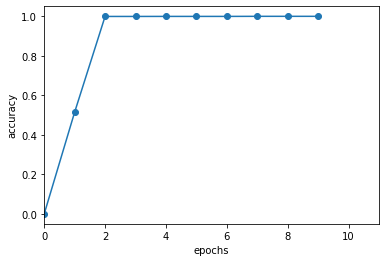

In [4]:
# 繪圖
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(-0.05, 1.05)
plt.xlim(0, 11)
plt.show()

## 建立一般的seq2seq 模型

In [ ]:
model_s2s = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model_s2s, optimizer)

acc_list_s2s = []
for epoch in range(max_epoch):
    print(datetime.datetime.now())
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model_s2s, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list_s2s.append(acc)
    print('val acc %.3f%%' % (acc * 100))


model_s2s.save_params()


2019-12-05 09:15:04.780222
| epoch 1 |  iter 1 / 351 | time 0[s] | loss 4.08
| epoch 1 |  iter 21 / 351 | time 5[s] | loss 3.21
| epoch 1 |  iter 41 / 351 | time 11[s] | loss 1.91
| epoch 1 |  iter 61 / 351 | time 17[s] | loss 1.78


## 建立 Peeky seq2seq 模型
https://hiroyuki.sano.ninja/notes/1cdcb48f-b8ed-4945-b3f6-6e189a2fa75f

In [ ]:
model_ps2s = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model_ps2s, optimizer)

acc_list_ps2s = []
for epoch in range(max_epoch):
    print(datetime.datetime.now())
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model_ps2s, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list_ps2s.append(acc)
    print('val acc %.3f%%' % (acc * 100))


model_ps2s.save_params()


In [ ]:
# 繪圖
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.plot(x, acc_list_s2s, marker='s')
plt.plot(x, acc_list_ps2s, marker='p')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(-0.05, 1.05)
plt.xlim(0, 11)
plt.show()